In [1]:
import tensorflow
tensorflow.__version__
#

e:\django work\virtualenvforaibot\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\django work\virtualenvforaibot\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\django work\virtualenvforaibot\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
e:\django work\virtualenvforaibot\lib\site-packages\tensorflow\python\framework

'1.13.2'

In [2]:
from sklearn import datasets

In [3]:
irosdata = datasets.load_iris()

In [4]:
type(irosdata)

sklearn.utils.Bunch

In [5]:
irosdata

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [61]:
import matplotlib.pyplot as plt 
from matplotlib import style
import numpy as np 
from sklearn import svm







style.use('ggplot')
class SVM:
    def __init__(self,visualise = True):
        # super().__init__()
        self.visualise = visualise 
        self.colors = {1:'r',-1:'b'}
        if self.visualise:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
        self.w = None 
        self.b = None
        self.count1 = 0


    def fit(self,data):
        self.data = data  
        # save all magnitudeas as key and fin the minimum one 
        opt_dict = {}

        transofrm = [[1,1],
                        [-1,1],
                        [-1,-1],
                        [1,-1] ]
        all_data = []
        for yi in self.data:
        # for yi in range(len(self.data)):
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
            
        # print(all_data)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

                        
        #extremely expensive
        b_range_multiple = 5
        # b_range_multiple = 2


        b_multiple = 5

        latest_optimum = self.max_feature_value * 10

        for step in step_sizes :
            w = np.array([latest_optimum,latest_optimum])
            #we can do this
            optimised = False 


            while not optimised:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transofrm:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                self.count1+=1
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimised = True
                else:
                    w = w - step


            norms = sorted([n for n in opt_dict])

            opt_choice = opt_dict[norms[0]]

            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2

    


    def predict(self,features):
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification!=0 and self.visualise:
            self.ax.scatter(features[0],features[1],s = 200,marker = '*', c = self.colors[classification])

        return classification

    def visualifucse(self,data_dick1):
        [[self.ax.scatter(x[0],x[1],s= 100,color = self.colors[i]) for x in data_dick1[i]] for i in data_dick1]

        # v = x.w+b 
        # psv = 1 
        # nsv = -1
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9 , self.max_feature_value*1.1)

        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]


        #postive support vector
        psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],"k")


        #negative support vector
        nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],"k")


        zer1 = hyperplane(hyp_x_min,self.w,self.b,0)
        zer2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[zer1,zer2])


        plt.show()


In [13]:
irosdata["feature_names"][0]

'sepal length (cm)'

In [17]:
irosdata
X = irosdata.data[:, :2]

In [18]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [46]:
len(irosdata.data[:, 1:3])

150

In [23]:
irosdata.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
irosdata.feature_names.index('petal length (cm)')

2

In [27]:
irosdata.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [28]:
irosdata.feature_names.index('sepal width (cm)')

1

In [29]:
peta_data = irosdata.data[:, irosdata.feature_names.index('petal length (cm)')]

In [30]:
peta_data

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [31]:
sepa_data = irosdata.data[:, irosdata.feature_names.index('sepal width (cm)')]

In [32]:
irosdata['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
irosdata['target_names']#index 2 = 'virgininca'

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
x1 = irosdata.data[0, 1:3]

In [41]:
x1l = x1.tolist()

In [42]:
x1l

[3.5, 1.4]

In [59]:
data_dict = {-1:[],1:[]} #-1 setosa 1 versicolor

In [64]:
for i in range(len(irosdata.data[:, [irosdata.feature_names.index('petal length (cm)'),irosdata.feature_names.index('sepal width (cm)')]])):
#     print(i.tolist())
    x1 = irosdata.data[i, [irosdata.feature_names.index('petal length (cm)'),irosdata.feature_names.index('sepal width (cm)')]]
#     print(x1.tolist())
    if(irosdata['target'][i]==0):
        #0 for setosa
        data_dict[-1].append(x1.tolist())
        pass
    elif(irosdata['target'][i]==1):
        data_dict[1].append(x1.tolist())

        pass
    

In [57]:
irosdata['target'][0]

0

In [65]:
len(data_dict[1])

50

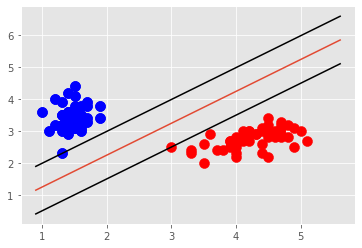

In [66]:
#the code will take lot of time to compile on CPU




svmobj = SVM()
svmobj.fit(data_dict)
svmobj.visualifucse(data_dict)

In [ ]:
X = [[-1,-3],[0,-1],[-1,-2],[1,-2],[2,2],[-1,2],[1,3],[-1,-1]]
y = [0,0,0,0 ,1,1,1,1]
clf = svm.SVC(kernel = 'linear')
clf.fit(X, y)

In [71]:
out_piutindex = []
data_index = []

In [68]:
data_index = irosdata.data[:, [irosdata.feature_names.index('petal length (cm)'),irosdata.feature_names.index('sepal width (cm)')]].tolist()

In [70]:
len(data_index)

150

In [ ]:
for i in irosdata['target']:
    out_piutindex.append(i.tolist())
    